<a href="https://colab.research.google.com/github/swanand19/DL/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))


[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))


In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)


[INFO] training network...
Epoch 1/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8378 - accuracy: 0.3424 - val_loss: 1.7243 - val_accuracy: 0.3984
Epoch 2/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6510 - accuracy: 0.4188 - val_loss: 1.6033 - val_accuracy: 0.4317
Epoch 3/50
1425/1563 [==========================>...] - ETA: 3s - loss: 1.5719 - accuracy: 0.4452

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))


[INFO] evaluating network...
313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

    airplane       0.61      0.65      0.63      1000
  automobile       0.81      0.49      0.61      1000
        bird       0.55      0.29      0.38      1000
         cat       0.40      0.32      0.35      1000
        deer       0.36      0.71      0.47      1000
         dog       0.47      0.39      0.42      1000
        frog       0.74      0.45      0.56      1000
       horse       0.48      0.72      0.58      1000
        ship       0.53      0.79      0.63      1000
       truck       0.73      0.44      0.55      1000

    accuracy                           0.52     10000
   macro avg       0.57      0.52      0.52     10000
weighted avg       0.57      0.52      0.52     10000



NameError: ignored

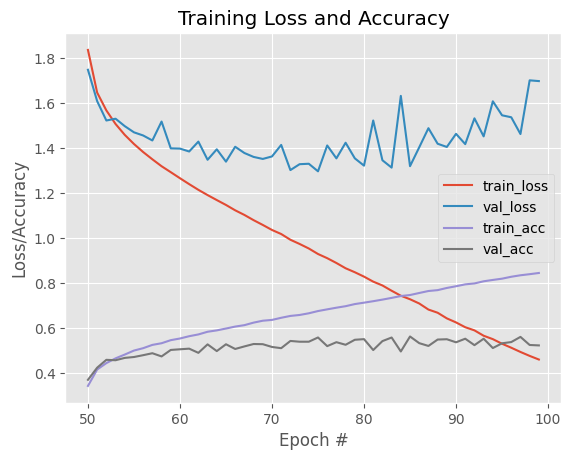

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(50, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(50, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(50, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(50, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output.png"])